In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

#Constants
G  = 6.6743e-11 #m^2 kg^-1 s^-2
Me = 5.972e24 #kg
Mm = 7.35e22 #kg
Re = 6.3781e6 #m
Rm = 1.7381e6 #m
wm = 7.272e-5 #rad/s

# Part 1

In [2]:
# constants
alpha = 0
g = 9.81 #m/s

h = 4e3 #m

#question 1
fft = np.sqrt(2.*h/g) #free fall time
print(f"Algebraic solution for free fall time: {fft} seconds")

Algebraic solution for free fall time: 28.55686245854129 seconds


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  3.000e+01]
        y: [[ 0.000e+00 -4.905e-08 ... -6.056e+02 -4.414e+03]
            [ 0.000e+00 -9.810e-04 ... -1.090e+02 -2.943e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000019824655BB0>
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
Numerical solution for free fall time: 28.556862458541303 seconds


Text(629.5277777777777, 0.5, 'Velocity (m/s)')

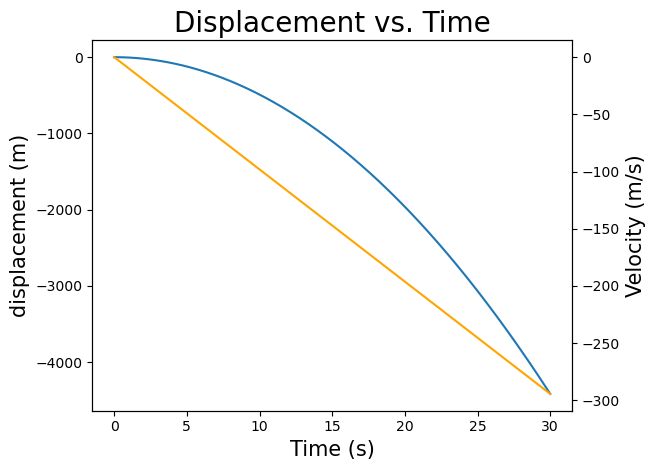

In [3]:
# Questions 2-4

def der(t, s):
    y = s[0]
    yDot = s[1]
    dydt = yDot
    dyDotdt = -g
    return (dydt, dyDotdt)

def event(t,s):
    return s[0]+h

s0 = (0, 0)

soln = solve_ivp(der, t_span=(0,30), y0=s0, events=event, dense_output=True)
print(soln)
print(f"Numerical solution for free fall time: {soln.t_events[0][0]} seconds")

fig, ax = plt.subplots(1,1)
ts = np.linspace(0, 30, 400)
solution = soln.sol(ts)
ax.plot(ts, solution[0], label="position")
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("displacement (m)", fontsize=15)
ax.set_title("Displacement vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(ts, solution[1], color="orange", label="velocity")
fig.tight_layout()
ax2.set_ylabel("Velocity (m/s)", fontsize=15)

## Figure 1

# Part 2


28.57565908679822
0.018796628256929182


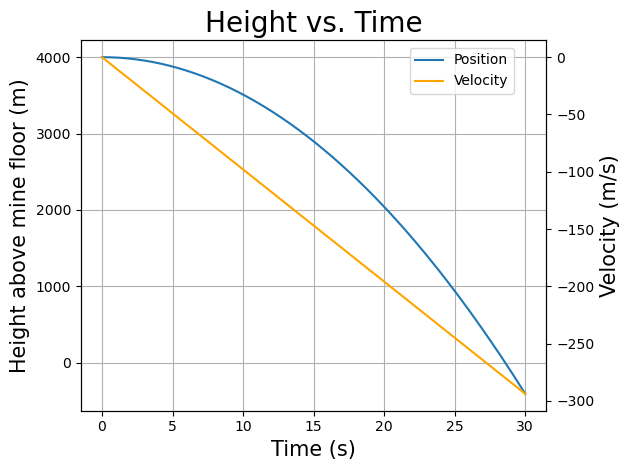

In [4]:
#question 1

g0= G*Me/Re**2 #m/s^2
rMine = Re-h #meters

def g(r):
    return g0*r/Re

def der(t,s, alpha, gamma):
    y = s[0]
    yDot = s[1]
    yDdot = -g(s[0]) - alpha*np.abs((yDot)**gamma)*np.sign(yDot) #make sure drag always points opposite direcion of motion
    return np.array((yDot, yDdot))

def event(t, s, alpha, gamma):
    return s[0]-rMine

tSpan = (0,30)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0, 2), y0 = yi, events=event)
print(soln.t_events[0][0])
print(soln.t_events[0][0]-fft)

fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Height vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.8))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

## Figure 2

Question 2: <br>
If the radius dependance of gravity is taken into effect, then the object will accelerate slightly slower than if we assumed a constant gravity, as some amount of the Earth's mass is now outside the object and is no longer accerating the object towards the center of the Earth. Since the depth of the mine is less than 1% the radius fo the Earth, the effect is essentially negigable, and only changes the time at which the object impacts the floor of the mine by 0.02 seconds.

83.359530872868
54.80266841432672


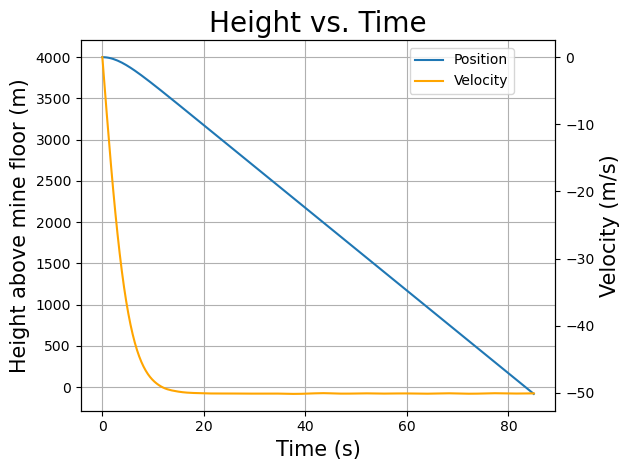

In [5]:
#Question 3
tSpan = (0,85)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0.0039, 2), y0 = yi, events=event)
print(soln.t_events[0][0])
print(soln.t_events[0][0]-fft)

fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Height vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.8))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

Including a drag term increases the fall time significantly, since at some point, the object will no longer be able to accelerate any more. For this plot, I found a drag coefficent which makes the terminal velocity 50 m/s which corresponds to a drag coefficient of $\alpha=0.0039$.

# Part 3

21.915951144661822 28.575679655174927


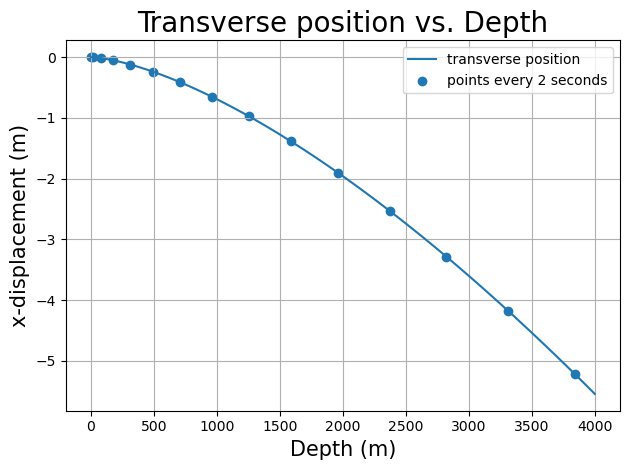

In [136]:
def derC(t,s, alpha, gamma, omega):
    x, y, z = s[0:3]
    xDot, yDot, zDot = s[3:6]
    a_cx = 2*omega*yDot
    a_dx = -alpha*np.abs((xDot)**gamma)*np.sign(xDot) #make sure drag always points opposite to velocity
    a_cy = -2*omega*xDot
    a_gy = -g(s[1])
    a_dy = -alpha*np.abs((yDot)**gamma)*np.sign(yDot) 

    xDdot = a_cx
    yDdot = a_gy + a_dy + a_cy
    zDdot = 0
    return np.array((xDot, yDot, zDot, xDdot, yDdot, zDdot))

def event(t, s, alpha, gamma, omega):
    return s[1]-rMine

tSpan = (0,30)
tEval = np.linspace(tSpan[0], tSpan[1], 50)
s0 = (0,Re,0,0,0,0)

soln = solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0, 2,wm), dense_output=True, events=[event,(lambda t, s, a, g, o: s[0]+2.5)])#solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=event)
t_hit = soln.t_events[0][0]
print(soln.t_events[1][0], t_hit)
fig, ax = plt.subplots(1,1)
time_dense = np.linspace(tSpan[0],t_hit, 300) 
ax.plot(Re-soln.sol(time_dense)[1], soln.sol(time_dense)[0], label="transverse position")
timePoints = np.arange(tSpan[0], t_hit, 2)
ax.scatter(Re-soln.sol(timePoints)[1], soln.sol(timePoints)[0], label="points every 2 seconds")
ax.set_xlabel("Depth (m)", fontsize=15)
ax.set_ylabel("x-displacement (m)", fontsize=15)
ax.set_title("Transverse position vs. Depth", fontsize=20)
ax.legend()
ax.grid()
fig.tight_layout()

## Figure 3: No drag

For figure 3, which assumes no drag, the particle would hit the wall of the mineshaft before it hits the bottom, since our particle would move over 5 meters from its starting position assuming it can go through matter, and it would only have to move 2.5 meters to hit the wall of our 5 meter diameter mineshaft. In reality, it would probably still hit the bottom, but likely only in pieces after ricocheting off the wall multiple times.

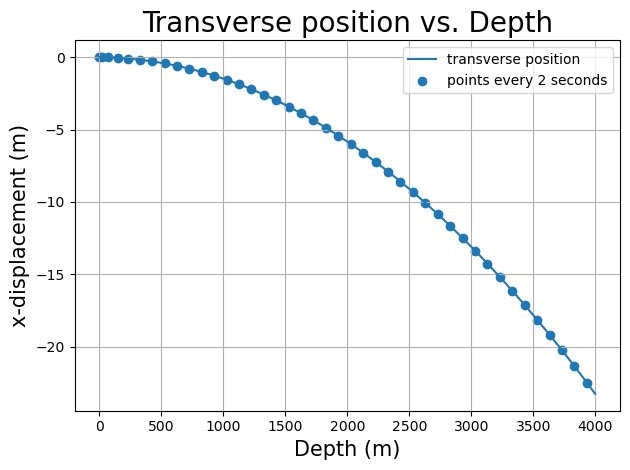

In [126]:
tSpan = (0,100)
tEval = np.linspace(tSpan[0], tSpan[1], 50)
s0 = (0,Re,0,0,0,0)

soln = solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=event)#solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=event)
t_hit = soln.t_events[0][0]

fig, ax = plt.subplots(1,1)
time_dense = np.linspace(tSpan[0],t_hit, 300) 
ax.plot(Re-soln.sol(time_dense)[1], soln.sol(time_dense)[0], label="transverse position")
timePoints = np.arange(tSpan[0], t_hit, 2)
ax.scatter(Re-soln.sol(timePoints)[1], soln.sol(timePoints)[0], label="points every 2 seconds")
ax.set_xlabel("Depth (m)", fontsize=15)
ax.set_ylabel("x-displacement (m)", fontsize=15)
ax.set_title("Transverse position vs. Depth", fontsize=20)
ax.legend()
ax.grid()
fig.tight_layout()

If you had drag, you would move a further distance from the center of the mineshaft (assuming you could move through the walls of the shaft), as you would spend much more time falling and so the tangential velocity you got from the coriolis force would have more time to build up.

# Part 4

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.081e+01 ...  7.919e+03  8.000e+03]
        y: [[ 6.378e+06  6.346e+06 ... -5.898e+06 -5.625e+06]
            [ 0.000e+00 -7.904e+02 ...  3.010e+03  3.726e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001982D275490>
 t_events: [array([ 7.604e+03,  7.605e+03]), array([ 1.267e+03,  3.802e+03,  6.337e+03])]
 y_events: [array([[-6.378e+06, -4.423e+00],
                  [-6.378e+06,  4.423e+00]]), array([[ 5.675e-10, -7.905e+03],
                  [-1.062e-09,  7.905e+03],
                  [ 1.128e-09, -7.905e+03]])]
     nfev: 1682
     njev: 0
      nlu: 0
Time it takes to reach the center of the Earth: 1267.3427999165972 seconds
Speed that the object has at the center of the Earth: 7905.277129564457 m/s
Time it takes to reach the other side of the Earth: 7603.605347353328 seconds


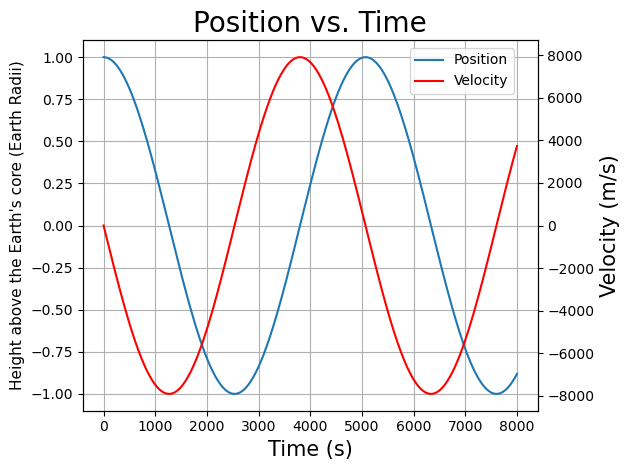

In [176]:

def der(t, s):
    y = s[0]
    yDot = s[1]
    yDDot = -g(np.abs(y))*np.sign(y)

    return (yDot, yDDot)

def otherSide(t,s):
    return s[0]+Re-1
    
def middle(t,s):
    return s[0]

tSpan = (0,8000)
ts = np.linspace(tSpan[0],tSpan[1], 100)
s0 = (Re, 0)

soln = solve_ivp(der, t_span=tSpan, t_eval=ts, y0=s0, dense_output=True, events=[otherSide, middle], rtol=1e-10)
print(soln)

center = soln.t_events[1][0]
centerSpeed = np.abs(soln.sol(center)[1])
otherSide=soln.t_events[0][0]

print(f"Time it takes to reach the center of the Earth: {center} seconds")
print(f"Speed that the object has at the center of the Earth: {centerSpeed} m/s")
print(f"Time it takes to reach the other side of the Earth: {otherSide} seconds")


denseT = np.linspace(tSpan[0],tSpan[1],500)

fig, ax = plt.subplots(1,1)
ax.plot(denseT, soln.sol(denseT)[0]/Re, label="Position")
ax2 = ax.twinx()
ax2.plot(denseT, soln.sol(denseT)[1], color="red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above the Earth's core (Earth Radii)", fontsize=11)
ax.set_title("Position vs. Time", fontsize=20)
ax.grid()
fig.legend(loc=(0.65,0.8))
fig.tight_layout()

## Figure 4

This figure shows that assuming uniform density, no drag and no coriolis force, the object will oscillate back and forth between the sides of the Earth such that it will fall throughout the Earth, turn around at the opposite surface, and fall back towards where it came from. It appears to do this in a sinusoidal manner.

Time it takes to reach the center of the Earth: 1267.3427999165972 seconds
Speed that the object has at the center of the Earth: 7905.277129564457 m/s
Time it takes to reach the other side of the Earth: 7603.605347353328 seconds

In [124]:
vOrbit = np.sqrt(G*Me/Re)
print(vOrbit)
print(vOrbit-centerSpeed)

period = 2*np.pi*Re/vOrbit
print(period)
print(otherSide)
print(period/otherSide)

7905.277129890415
3.259583536419086e-07
5069.371199675785
7603.605347353328
0.6667062489560084


The speed of the object as it goes through the center of the Earth is equal to speed that the object would have to go at to orbit around the Earth at the Earth's radius.

The orbital period of the object at the Earth's radius is 2/3rds that of the time it takes to fall from one side of the planet to the other side.

# Part 5

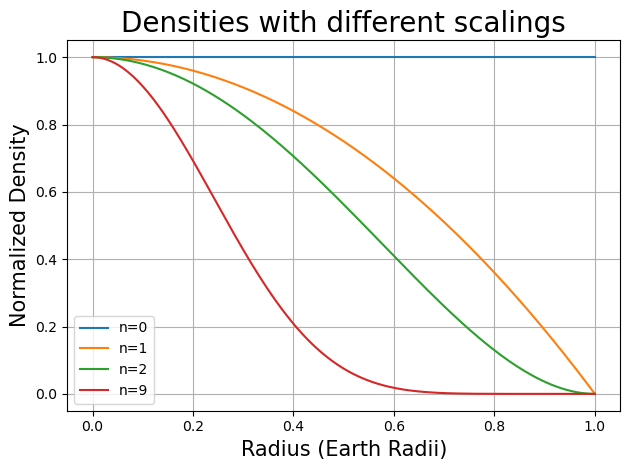

In [165]:
def rho(r, Rho0, N):
    return Rho0*(1-r**2/Re**2)**N

def dM(r, Rho0, N):
    return 4*np.pi * r**2 * rho(r, Rho0,N)

def M(r, Rho0, N):
    return quad(dM, 0, r,args=(Rho0, N))[0]

rs = np.linspace(0, Re,200)

ns = [0, 1, 2, 9]
fig, ax = plt.subplots(1,1)
for n in ns:
    ax.plot(rs/Re, rho(rs, 1, n), label=f"n={n}")
ax.set_xlabel("Radius (Earth Radii)", fontsize=15)
ax.set_ylabel("Normalized Density", fontsize=15)
ax.set_title("Densities with different scalings", fontsize=20)
ax.grid()
ax.legend()
fig.tight_layout()


## Figure 5

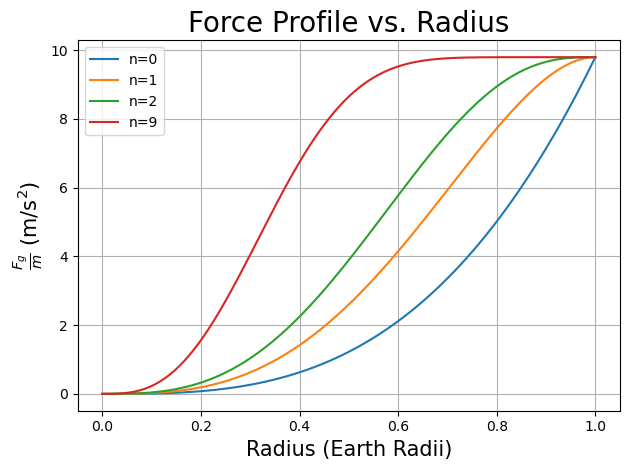

In [164]:
fig, ax = plt.subplots(1,1)
for n in ns:
    Mass = M(Re, 1, n)
    rho0=Me/Mass
    aS = np.zeros_like(rs)
    for i in range(len(rs)):
        aS[i] = G*M(rs[i],rho0,n)/Re**2
    ax.plot(rs/Re, aS, label=f"n={n}")
ax.legend()
ax.set_title("Force Profile vs. Radius", fontsize=20)
ax.set_xlabel("Radius (Earth Radii)", fontsize=15)
ax.set_ylabel("$\\frac{F_g}{m}$ (m/s$^2$)", fontsize=15)
ax.grid()
fig.tight_layout()

## Figure 6

Time to core for n=0: 1267.2409534601404 seconds
Speed it is going at the core for n=0: 7905.971248072887
Time to core for n=1: 1096.89148200254 seconds
Speed it is going at the core for n=1: 10435.238778034789
Time to core for n=2: 1035.138775425471 seconds
Speed it is going at the core for n=2: 12200.745609087588
Time to core for n=9: 943.8748065601621 seconds
Speed it is going at the core for n=9: 18391.9968315182


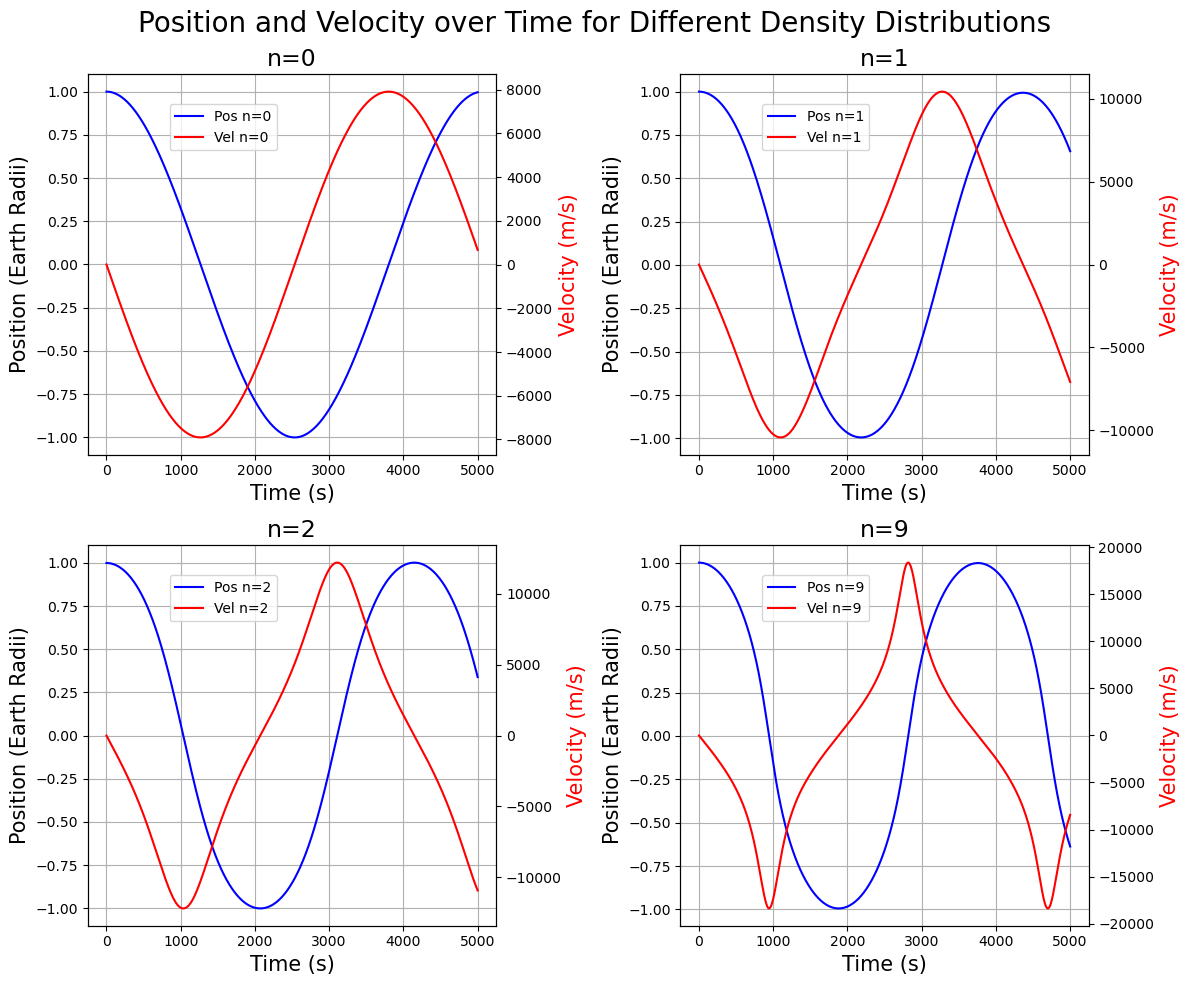

In [204]:
def der(t, s, Rho0, N):
    y = s[0]
    yDot = s[1]
    yDDot = -np.sign(y)*G*M(np.abs(y), Rho0, N)/np.abs(y)**2
    return np.array((yDot, yDDot))

def event(t, s, Rho0, N):
    return s[0]
    
fig, axs = plt.subplots(2,2, figsize=(12,10))
axs = axs.flatten()
tSpan = (0,5000)
ts = np.linspace(tSpan[0],tSpan[1],200)
s0 = (Re, 0)
denseTs = np.linspace(tSpan[0], tSpan[1],1000)
for i in range(len(ns)):
    ax = axs[i]
    ax2 = ax.twinx()
    rho0 = Me/M(Re, 1, ns[i])
    soln = solve_ivp(der,t_span=tSpan, t_eval=ts, y0=s0, dense_output=True, args=(rho0, ns[i]), events=event)
    print(f"Time to core for n={ns[i]}: {soln.t_events[0][0]} seconds")
    print(f"Speed it is going at the core for n={ns[i]}: {np.abs(soln.y_events[0][0][1])}")
    ax.plot(denseTs, soln.sol(denseTs)[0]/Re, label=f"Pos n={ns[i]}", color="blue")
    ax.plot([],[],color="red", label=f"Vel n={ns[i]}") #hack to get both labels on the legend
    ax.set_title(f"n={ns[i]}", fontsize=17)
    ax.set_xlabel("Time (s)", fontsize=15)
    ax.set_ylabel("Position (Earth Radii)", fontsize=15)
    ax2.set_ylabel("Velocity (m/s)", color="red", fontsize=15)
    ax.grid()
    ax.legend(loc=(0.2,0.8))
    ax2.plot(denseTs, soln.sol(denseTs)[1], label=f"Vel n={ns[i]}", color="red")
fig.suptitle("Position and Velocity over Time for Different Density Distributions", fontsize=20)
fig.tight_layout()

## Figure 7

Time to core for n=0: 1267.2409534601404 seconds<br>
Speed it is going at the core for n=0: 7905.971248072887

Time to core for n=1: 1096.89148200254 seconds<br>
Speed it is going at the core for n=1: 10435.238778034789

Time to core for n=2: 1035.138775425471 seconds<br>
Speed it is going at the core for n=2: 12200.745609087588

Time to core for n=9: 943.8748065601621 seconds<br>
Speed it is going at the core for n=9: 18391.9968315182

# Part 6

In [224]:
g0_m = G*Mm/Rm**2
def der(t, s):
    y = s[0]
    yDot = s[1]
    yDdot = -np.sign(y)*np.abs(g0_m*y/Rm)
    return np.array((yDot, yDdot))

def event(t, s):
    return s[0]

tSpan=(0,10000)
ts = np.linspace(tSpan[0],tSpan[1],500)
s0=(Rm, 0)

soln = solve_ivp(der, t_span=tSpan, t_eval=ts, y0=s0, events=event)

print(f"Time it takes to fall to the center of the moon: {soln.t_events[0][0]} seconds")

densityM = Mm/(4/3*np.pi*Rm**3)
densityE = Me/(4/3*np.pi*Re**3)
print(f"The density of the Moon is {densityM/densityE} times that of the Earth's density")

Time it takes to fall to the center of the moon: 1624.9059919736462 seconds
The density of the Moon is 0.6081591337511927 times that of the Earth's density


$\frac{d^2y}{dt^2}=-g_0\frac{y}{R}\implies y(t)=Y_0\cos(\omega t)+V_0\sin(\omega t),\omega=\sqrt{\frac{g_0}{R}}$<br>
If $V_0=0$, $y(t)=0$ when $\omega t=\frac{\pi}{2}\implies t=\sqrt{\frac{\pi^2R}{4g_0}}$<br>
$g_0=G\frac{\rho4\pi R^3}{3R^2}=G\frac{4\rho\pi R}{3}$<br>
$t_{\text{center}}=\sqrt{\frac{\pi^2R}{4G\frac{4\rho\pi R}{3}}}=\sqrt{\frac{3\pi}{16G\rho}}$

1625.1201867414668
1267.342799918946


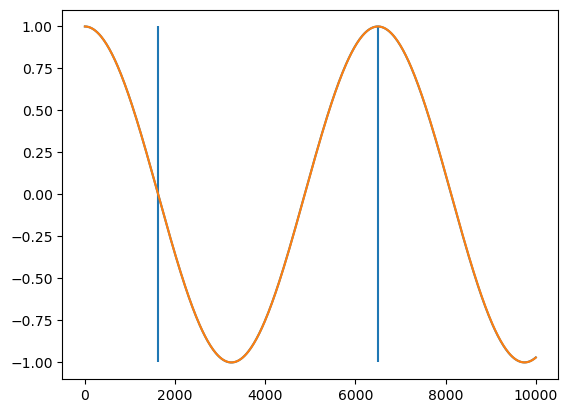

In [247]:
print(np.sqrt(3*np.pi/(16*G*densityM)))
print(np.sqrt(3*np.pi/(16*G*densityE)))


omega = np.sqrt(g0_m/Rm)

fig, ax = plt.subplots(1,1)
ax.plot(soln.t,soln.y[0]/Rm)
#ax.vlines(np.sqrt(3*np.pi/(16*G*densityM*np.pi)),-1,1)
ax.vlines(2*np.pi/omega,-1,1)
ax.vlines(np.sqrt(3*np.pi/(16*G*densityM)),-1,1)
ax.plot(soln.t, Rm*np.cos(np.sqrt(g0_m/Rm)*soln.t)/Rm)

The time it takes to fall to the center of a uniform planet ignoring coriolis and drag forces is proportional to $\frac{1}{\sqrt{\rho}}$ and is equal to $\sqrt{\frac{3\pi}{16G\rho}}$